<a href="https://colab.research.google.com/github/Sourav-Manik/Machine_Learning/blob/main/Logistic_Regression_and_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np

#2.Import Data

In [ ]:
claimants_data = pd.read_csv('/content/claimants.csv')
claimants_data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


#3.Data Understanding

In [ ]:
claimants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
claimants_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


#4.Data Preparation / Preprocessing

In [ ]:
claimants_data.dropna(axis=0,inplace = True)

In [ ]:
claimants_data.shape

(1096, 7)

In [ ]:
claimants_data.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [ ]:
del claimants_data['CASENUM']

In [ ]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


#5.Model Building

In [ ]:
X = claimants_data.drop(['ATTORNEY'],axis = 1)
y = claimants_data[['ATTORNEY']]

In [ ]:
X.shape, y.shape

((1096, 5), (1096, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1,shuffle = True,stratify = y)

In [ ]:
X_train.shape , y_train.shape  #training sample

((876, 5), (876, 1))

In [ ]:
X_test.shape , y_test.shape    #test sample

((220, 5), (220, 1))

#6.Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
logistic_model.coef_

array([[ 0.38712292,  0.58900639, -0.35025806,  0.00520909, -0.40616005]])

In [ ]:
logistic_model.intercept_

array([-0.10874931])

Logistic regression is a parametric model because it has coefficient and intercept. 

#7.Model Testing

Training Accuracy

In [ ]:
y_train_pred = logistic_model.predict(X_train)

Test Accuracy

In [ ]:
y_test_pred = logistic_model.predict(X_test)

#8.Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score

Training Accuracy

In [ ]:
print(accuracy_score(y_train,y_train_pred))

0.7054794520547946


In [ ]:
print(confusion_matrix(y_train,y_train_pred))

[[301 161]
 [ 97 317]]


Here we have to focus more on 'false negative' because the insurance company is more interested in minimizing their claims cost (i.e. model predicted 'no attorney' but actually 'attorney' was represent the client)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       462
           1       0.66      0.77      0.71       414

    accuracy                           0.71       876
   macro avg       0.71      0.71      0.71       876
weighted avg       0.71      0.71      0.71       876



In [ ]:
print(precision_score(y_train,y_train_pred))  #stability

0.6631799163179917


In [ ]:
print(recall_score(y_train,y_train_pred))     #accuracy

0.7657004830917874


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#ROC - receiver operating characteristic. It is a plot between true positive rate vs false positive rates
#AUC - Area under the curve. It helps to find seperability.

fpr,tpr, thresholds = roc_curve(y,logistic_model.predict_proba (X)[:,1] )

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

0.7086078173034694


Text(0, 0.5, 'True Positive Rate')

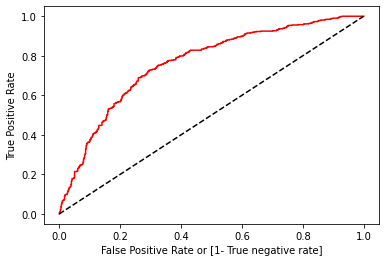

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1- True negative rate]')
plt.ylabel('True Positive Rate')

Test Accuracy

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7090909090909091

#9.Model Deployment

In [ ]:
from pickle import dump

In [ ]:
dump(logistic_model,open('model.pkl','wb'))

In [ ]:
from pickle import load

In [ ]:
loaded_model = load(open('model.pkl','rb'))

In [ ]:
y_pred_validation = loaded_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_validation)

0.7090909090909091

In [ ]:
#End